# Chapter 10 In-chapter examples

In [2]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

In [3]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 10.2: Empirical distribution under $H_0$

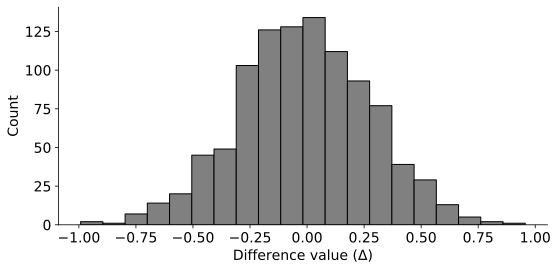

In [6]:
N = 100 # per group per sample
numExps = 1000

meandiff = np.zeros(numExps)

# run the experiment
for i in range(numExps):
  pre = stats.truncnorm(a=-5,b=10,loc=6,scale=2).rvs(N)
  pst = stats.truncnorm(a=-5,b=10,loc=6,scale=2).rvs(N)

  meandiff[i] = np.mean(pst) - np.mean(pre)


plt.figure(figsize=(8,4))
plt.hist(meandiff,bins=20,edgecolor='k',color='gray')
plt.xlabel(r'Difference value ($\Delta$)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Fig 10.3: Distribution assuming $H_0$ is true

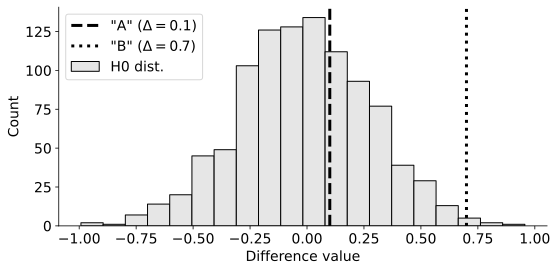

In [9]:
plt.figure(figsize=(8,4))

plt.hist(meandiff,bins=20,edgecolor='k',color=(.9,.9,.9))
plt.axvline(.1,color='k',linestyle='--',linewidth=3)
plt.axvline(.7,color='k',linestyle=':',linewidth=3)
plt.xlabel('Difference value')
plt.ylabel('Count')
plt.legend([r'"A" ($\Delta = 0.1$)',r'"B" ($\Delta = 0.7$)','H0 dist.'])

plt.tight_layout()
plt.show()

### Fig 10.4: analytical vs. empirical $H_0$ Distribution

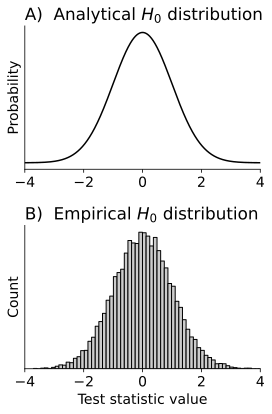

In [11]:
empirical = np.random.normal(loc=0,scale=1,size=10000)
x = np.linspace(-4,4,1001)
analytical = stats.norm.pdf(x) * np.diff(x[:2])

_,axs = plt.subplots(2,1,figsize=(4,6))

axs[0].plot(x,analytical,'k')
axs[0].set_title(r'A)  Analytical $H_0$ distribution')
axs[0].set(xlim=[-4,4],yticks=[],ylabel='Probability')

axs[1].hist(empirical,bins='fd',color=(.8,.8,.8),edgecolor='k')
axs[1].set_title(r'B)  Empirical $H_0$ distribution')
axs[1].set(xlim=[-4,4],yticks=[],ylabel='Count',xlabel='Test statistic value')

plt.tight_layout()
plt.show()

### Fig 10.5: p-values and thresholds

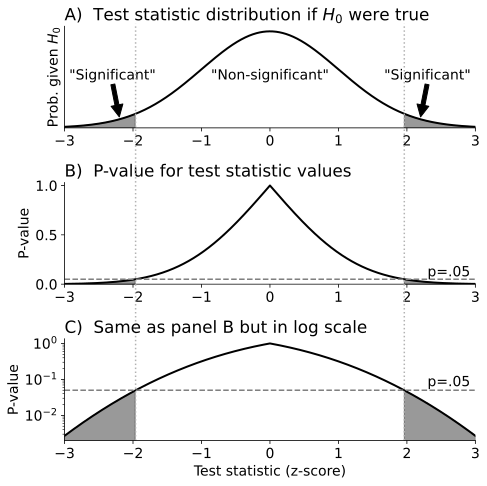

In [13]:
# create a Gaussian probability curve
zvals = np.linspace(-3,3,1001)
zpdf  = stats.norm.pdf(zvals)


_,axs = plt.subplots(3,1,figsize=(7,7))

# plot the probability function and the vertical lines
axs[0].plot(zvals,zpdf,'k',linewidth=2)
axs[0].set(xlim=zvals[[0,-1]],ylim=[0,.42],yticks=[],ylabel='Prob. given $H_0$')


# two-tailed p-values
pvalsL = stats.norm.cdf(zvals[:np.argmin(zvals**2)])
pvalsR = 1-stats.norm.cdf(zvals[np.argmin(zvals**2):])
pvals2 = 2*np.concatenate((pvalsL,pvalsR),axis=0) # doubled for a two-tailed test

# plot the probability function and the vertical lines
for i in range(1,3):
  axs[i].plot(zvals,pvals2,'k',linewidth=2)
  axs[i].set(xlim=zvals[[0,-1]],ylabel='P-value')
  axs[i].axhline(.05,color=(.5,.5,.5),linestyle='--')



# draw patches for significant regions
zidx = np.arange(np.argmin((zvals-stats.norm.ppf(.025))**2))
axs[0].fill_between(zvals[zidx],zpdf[zidx],color='k',alpha=.4)
axs[1].fill_between(zvals[zidx],pvals2[zidx],color='k',alpha=.4)
axs[2].fill_between(zvals[zidx],pvals2[zidx],color='k',alpha=.4)

zidx = np.arange(np.argmin((zvals-stats.norm.ppf(.975))**2),len(zvals))
axs[0].fill_between(zvals[zidx],zpdf[zidx],color='k',alpha=.4)
axs[1].fill_between(zvals[zidx],pvals2[zidx],color='k',alpha=.4)
axs[2].fill_between(zvals[zidx],pvals2[zidx],color='k',alpha=.4)

axs[2].axvline(x=zvals[np.argmin((zvals-stats.norm.ppf(.025))**2)],ymin=0,ymax=4.1,c=(.7,.7,.7),linestyle=':',clip_on=False)
axs[2].axvline(x=zvals[np.argmin((zvals-stats.norm.ppf(.975))**2)],ymin=0,ymax=4.1,c=(.7,.7,.7),linestyle=':',clip_on=False)




# indicators
axs[0].annotate('"Significant"',xy=(-2.2,stats.norm.pdf(-2.2)+.01),xytext=(-2.3,.2),ha='center',arrowprops={'color':'k'})
axs[0].annotate('"Significant"',xy=( 2.2,stats.norm.pdf( 2.2)+.01),xytext=( 2.3,.2),ha='center',arrowprops={'color':'k'})
axs[0].text(0,.2,'"Non-significant"',ha='center')
axs[1].text(2.3,.08,'p=.05')
axs[2].text(2.3,.065,'p=.05')


# panel titles
axs[0].set_title(r'A)  Test statistic distribution if $H_0$ were true')
axs[1].set_title(r'B)  P-value for test statistic values')
axs[2].set_title(r'C)  Same as panel B but in log scale')


axs[2].set(yscale='log',xlabel='Test statistic (z-score)')
axs[1].set_ylim([0,1.03])

plt.tight_layout()
plt.show()